# DS203- 2021 Project

# New Section
## Installing required libraries

In [ ]:
!pip install yfinance
!pip install yahoofinancials
!pip install fastai
!pip install pmdarima

## Importing Basic Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import yfinance as yf
from yahoofinancials import YahooFinancials
%matplotlib inline
from fastai.tabular import add_datepart

## creating dataframe for stock and EDA

In [ ]:
# stock for TATAMOTORS
stock = "TATAMOTORS.NS"

In [ ]:
# accessing data
df = yf.download(stock, start='2012-01-01', end='2021-11-24', progress=False)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-16,506.899994,526.849976,506.200012,519.049988,519.049988,55897781
2021-11-17,520.250000,536.700012,520.250000,530.150024,530.150024,48463415
2021-11-18,531.450012,534.200012,501.299988,509.700012,509.700012,47197742
2021-11-22,512.250000,512.250000,478.399994,486.100006,486.100006,40044849
2021-11-23,484.399994,499.350006,477.000000,495.500000,495.500000,27553684


In [ ]:
df.shape

(2434, 6)

In [ ]:
df = df.reset_index()

In [ ]:
# dropping features as they are highly correalted with the closing price
df = df.drop(['Open', 'High', 'Low', 'Adj Close' ], axis=1)

In [ ]:
df.shape

(2434, 3)

In [ ]:
# checking for repeated rows
dates = df['Date']
df[dates.isin(dates[dates.duplicated()])].sort_index()

,Date,Close,Volume


In [ ]:
df = df.drop_duplicates()

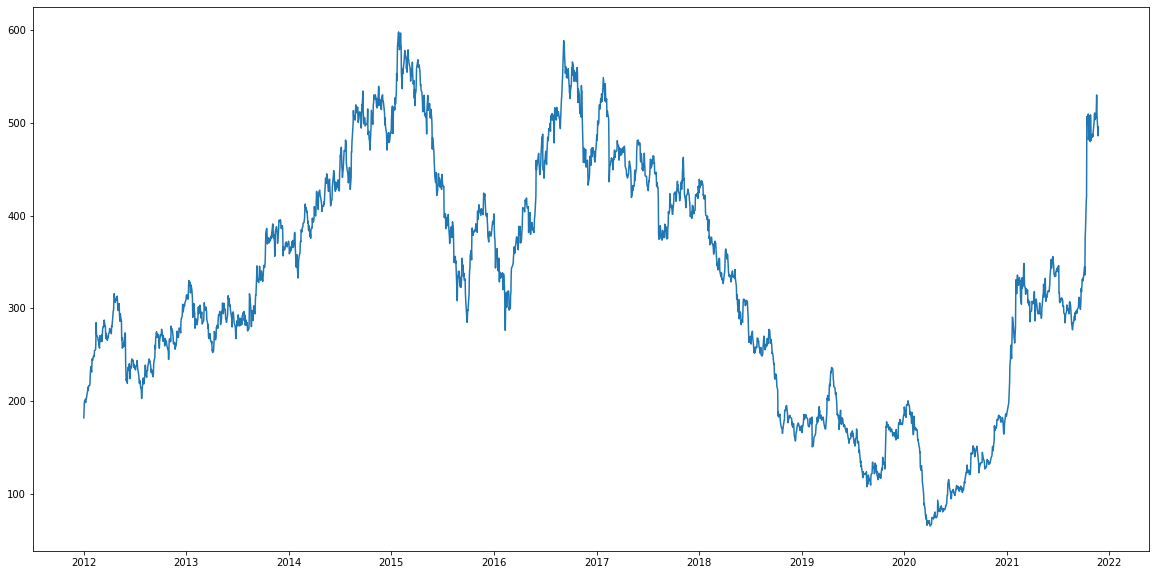

In [ ]:
# plotting price movement
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.set_index('Date', inplace=True)
 # plotting
pt.figure(figsize=(20,10))
pt.plot(df['Close'], label='Close Price movement')

### creating new features and understanding their nature

In [ ]:
stock_price = df['Close'].to_frame()
stock_price['simple_MA_60'] = stock_price['Close'].rolling(60).mean()
stock_price['cumulative_MA'] = stock_price['Close'].expanding().mean()
stock_price['exponential_MA_60'] = stock_price['Close'].ewm(span=60).mean()
stock_price.dropna(inplace=True)

plots for Mean Averages for a roll back period for 60 days

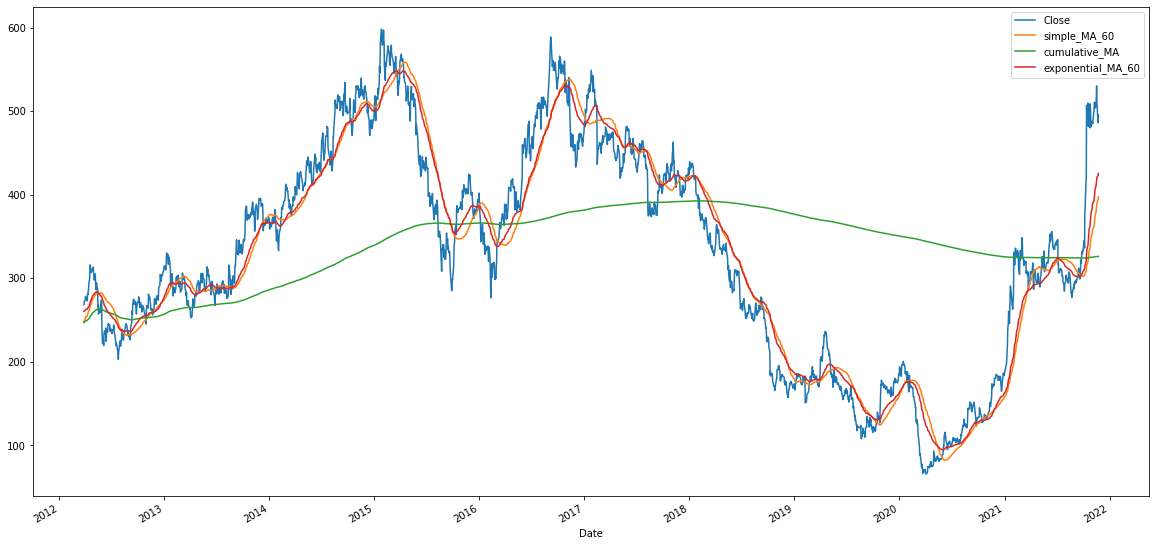

In [ ]:
stock_price[['Close', 'simple_MA_60','cumulative_MA','exponential_MA_60']].plot(label='MA comparison', figsize=(20,10))


the exponential MA provides major thresholds and reverting points while simple and cumulative MA traces the price

adding features- 

*   Moving Averages (MA)
*   Bollinger Bands (region enclosing +- std about MA)



In [ ]:
df['simple_MA_60'] = df['Close'].rolling(60).mean()

In [ ]:
df['BollingerBand_Up_60_1'] = df['Close'].rolling(60).mean() + df['Close'].rolling(60).std()
df['BollingerBand_Down_60_1'] = df['Close'].rolling(60).mean() - df['Close'].rolling(60).std()
df['BollingerBand_Up_60_2'] = df['Close'].rolling(60).mean() + 2*df['Close'].rolling(60).std()
df['BollingerBand_Down_60_2'] = df['Close'].rolling(60).mean() - 2*df['Close'].rolling(60).std()
df['BollingerBand_Up_20_2'] = df['Close'].rolling(20).mean() + 2*df['Close'].rolling(20).std()
df['BollingerBand_Down_20_2'] = df['Close'].rolling(20).mean() - 2*df['Close'].rolling(20).std()
df['BollingerBand_Up_20_1'] = df['Close'].rolling(20).mean() + df['Close'].rolling(20).std()
df['BollingerBand_Down_20_1'] = df['Close'].rolling(20).mean() - df['Close'].rolling(20).std()
df['BollingerBand_Up_10_1'] = df['Close'].rolling(10).mean() + df['Close'].rolling(10).std()
df['BollingerBand_Down_10_1'] = df['Close'].rolling(10).mean() - df['Close'].rolling(10).std()
df['BollingerBand_Up_10_2'] = df['Close'].rolling(10).mean() + 2*df['Close'].rolling(10).std()
df['BollingerBand_Down_10_2'] = df['Close'].rolling(10).mean() - 2*df['Close'].rolling(10).std()
df = df.dropna()

Bollinger Bands Visualisation

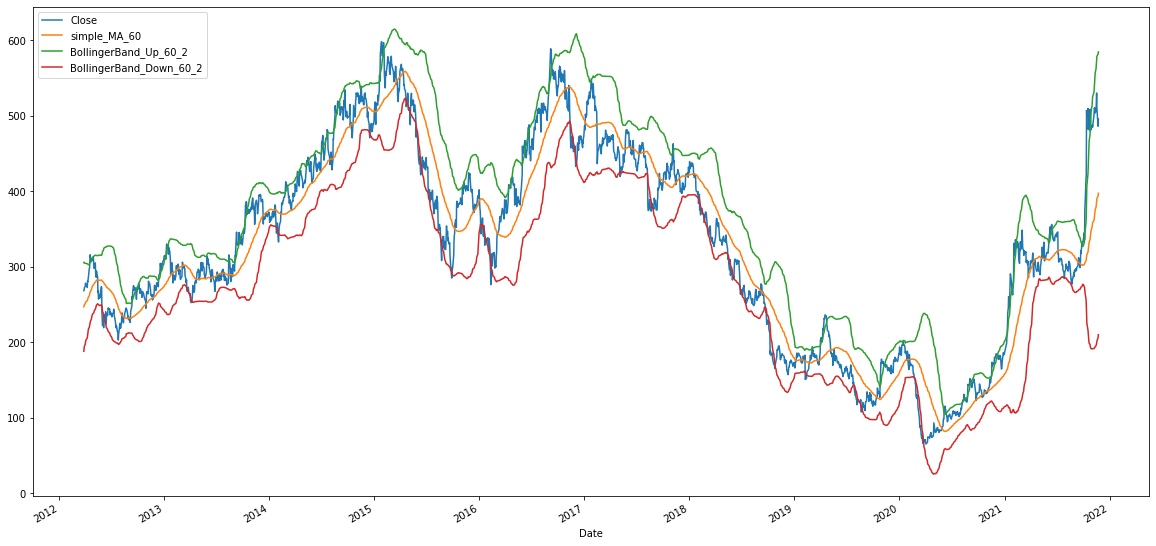

In [ ]:
df[['Close', 'simple_MA_60', 'BollingerBand_Up_60_2', 'BollingerBand_Down_60_2']].plot(label='BollingerBands', figsize=(20,10))

In [ ]:
display(df)

,Close,Volume,simple_MA_60,BollingerBand_Up_60_1,BollingerBand_Down_60_1,BollingerBand_Up_60_2,BollingerBand_Down_60_2,BollingerBand_Up_20_2,BollingerBand_Down_20_2,BollingerBand_Up_20_1,BollingerBand_Down_20_1,BollingerBand_Up_10_1,BollingerBand_Down_10_1,BollingerBand_Up_10_2,BollingerBand_Down_10_2
Date,,,,,,,,,,,,,,,
2012-03-28,268.272522,7597363,247.003970,276.459411,217.548529,305.914852,188.093089,288.547293,257.199039,280.710230,265.036102,281.028863,265.756330,288.665129,258.120064
2012-03-29,269.064026,9912451,248.455072,276.776553,220.133591,305.098034,191.812110,288.539135,257.306135,280.730885,265.114385,277.475898,265.648559,283.389568,259.734889
2012-03-30,272.329010,6411121,249.795693,277.285905,222.305481,304.776116,194.815270,288.415962,258.225764,280.868413,265.773314,274.595410,266.263349,278.761440,262.097319
2012-04-02,273.862549,8010959,251.042322,277.881245,224.203398,304.720169,197.364474,288.327217,259.219798,281.050362,266.496653,272.425735,267.117136,275.080034,264.462837
2012-04-03,278.265320,8305886,252.347489,278.556667,226.138311,304.765844,199.929133,288.759907,259.489574,281.442324,266.807157,274.465150,267.026811,278.184320,263.307642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16,519.049988,55897781,382.536667,475.340635,289.732700,568.144602,196.928733,522.036513,472.338484,509.612006,484.762991,513.176039,489.873961,524.827078,478.222922
2021-11-17,530.150024,48463415,386.483334,480.457986,292.508683,574.432638,198.534031,526.663815,469.766184,512.439407,483.990592,519.274561,492.665441,532.579121,479.360882
2021-11-18,509.700012,47197742,390.260001,484.562195,295.957807,578.864388,201.655614,527.406651,471.803350,513.505825,485.704175,519.849912,496.460092,531.544822,484.765182


## Analyzing different Models

### without using added features and history

In [ ]:
data_without_history = df['Close'].to_frame()
display(data_without_history)

,Close
Date,
2012-03-28,268.272522
2012-03-29,269.064026
2012-03-30,272.329010
2012-04-02,273.862549
2012-04-03,278.265320
...,...
2021-11-16,519.049988
2021-11-17,530.150024
2021-11-18,509.700012


In [ ]:
data_without_history = data_without_history.reset_index()
display(data_without_history)

,Date,Close
0,2012-03-28,268.272522
1,2012-03-29,269.064026
2,2012-03-30,272.329010
3,2012-04-02,273.862549
4,2012-04-03,278.265320
...,...,...
2370,2021-11-16,519.049988
2371,2021-11-17,530.150024
2372,2021-11-18,509.700012
2373,2021-11-22,486.100006


In [ ]:
date = data_without_history['Date'].to_frame()

adding date related features 

In [ ]:
add_datepart(data_without_history, 'Date')
data_without_history.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


creating new feature which will represent first and the last day of the week

In [ ]:
data_without_history['mon_fri'] = 0
for i in range(0,len(data)):
    if (data_without_history['Dayofweek'][i] == 0 or data_without_history['Dayofweek'][i] == 4):
        data_without_history['mon_fri'][i] = 1
    else:
        data_without_history['mon_fri'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
new_data = pd.concat((data_without_history,date),axis=1)
display(new_data)

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri,Date
0,268.272522,2012,3,13,28,2,88,False,False,False,False,False,False,0,2012-03-28
1,269.064026,2012,3,13,29,3,89,False,False,False,False,False,False,0,2012-03-29
2,272.329010,2012,3,13,30,4,90,False,False,False,False,False,False,1,2012-03-30
3,273.862549,2012,4,14,2,0,93,False,False,False,False,False,False,1,2012-04-02
4,278.265320,2012,4,14,3,1,94,False,False,False,False,False,False,0,2012-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,519.049988,2021,11,46,16,1,320,False,False,False,False,False,False,0,2021-11-16
2371,530.150024,2021,11,46,17,2,321,False,False,False,False,False,False,0,2021-11-17
2372,509.700012,2021,11,46,18,3,322,False,False,False,False,False,False,0,2021-11-18
2373,486.100006,2021,11,47,22,0,326,False,False,False,False,False,False,1,2021-11-22


In [ ]:
train_size = int(0.7*new_data.shape[0])
test_size = int(0.3*new_data.shape[0])
print(train_size)
print(test_size)

1662
712


In [ ]:
train_data = new_data[:train_size]
train_data = train_data.drop(['Date'], axis=1)
test_data = new_data[train_size:]
test_data = test_data.drop(['Date'], axis=1)
X_train = train_data.drop(['Close'], axis=1)
Y_train = train_data['Close']
X_test = test_data.drop(['Close'], axis = 1)
Y_test = test_data['Close']
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1662, 13)
(1662,)
(713, 13)
(713,)


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
price_prediction_wh = model.predict(X_test)
rms=np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(price_prediction_wh)),2)))
print(rms)
print(price_prediction_wh)

246.60354869944692
[394.563913 441.737074 446.614788 439.556011 ... 430.357968 430.838367 427.471709 429.860375]


In [ ]:
new_data.set_index('Date', inplace=True)

Visualizing Prediction

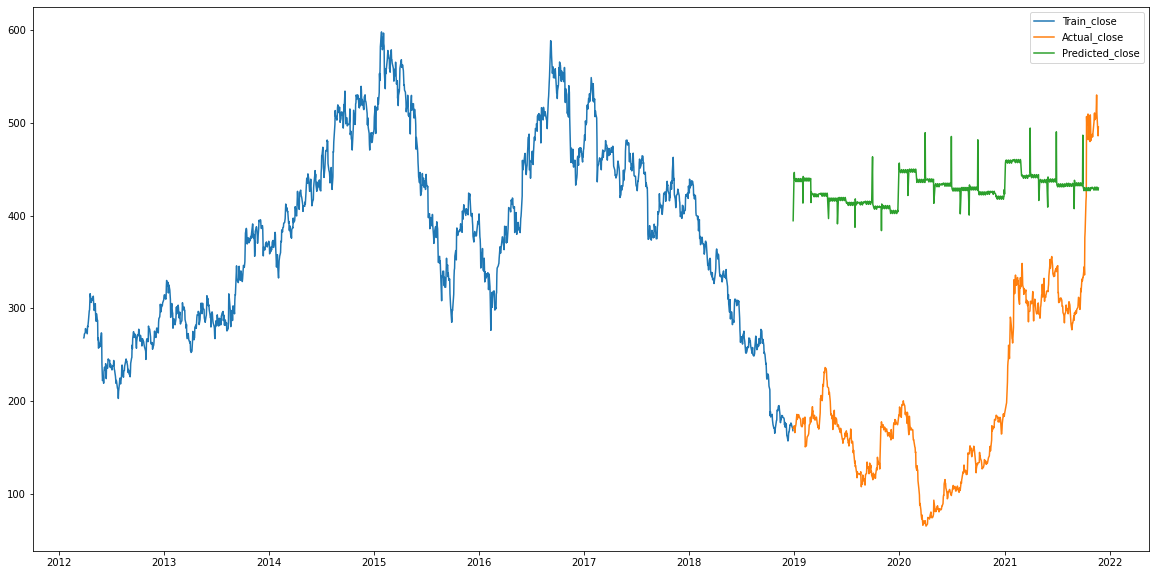

In [ ]:
test_data['Predictions'] = 0
test_data['Predictions'] = price_prediction_wh

test_data.index = new_data[train_size:].index
train_data.index = new_data[:train_size].index

pt.figure(figsize=(20,10))
pt.plot(train_data['Close'])
pt.plot(test_data[['Close', 'Predictions']])
pt.legend(['Train_close', 'Actual_close', 'Predicted_close'])

KNN 

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[4,5,6,7,8,9,10,11]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(X_train,Y_train)
price_prediction_KNN_wh = model.predict(X_test)

In [ ]:
rms_KNN=np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(price_prediction_KNN)),2)))
rms

246.60354869944692

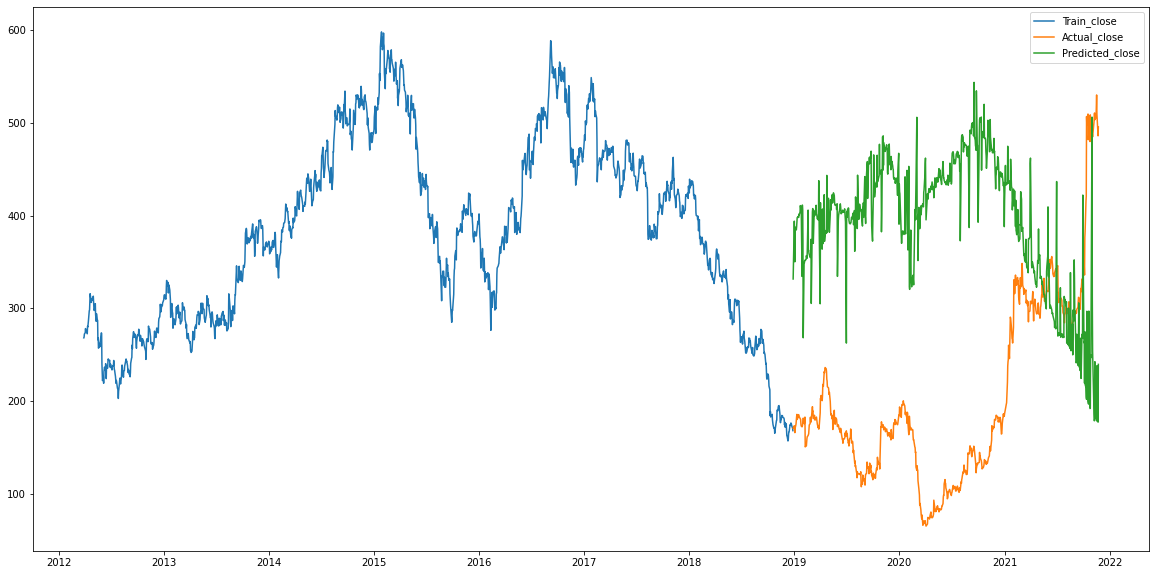

In [ ]:
test_data['Predictions'] = 0
test_data['Predictions'] = price_prediction_KNN_wh

test_data.index = new_data[train_size:].index
train_data.index = new_data[:train_size].index

pt.figure(figsize=(20,10))
pt.plot(train_data['Close'])
pt.plot(test_data[['Close', 'Predictions']])
pt.legend(['Train_close', 'Actual_close', 'Predicted_close'])

## using features for past/ historical data

creating new historical features by shifting tha rows by 20, 40 and 60 days 

In [ ]:
data = df['Close'].to_frame()
for lag in [20,40,60]:
    shift = lag
    shifted = df.shift(shift)
    shifted.columns = [str.format("%s_shifted_by_%d" % (column ,shift)) for column in shifted.columns]
    data = pd.concat((data,shifted),axis=1)

In [ ]:
data = data.dropna()
display(data)

,Close,Close_shifted_by_20,Volume_shifted_by_20,simple_MA_60_shifted_by_20,BollingerBand_Up_60_1_shifted_by_20,BollingerBand_Down_60_1_shifted_by_20,BollingerBand_Up_60_2_shifted_by_20,BollingerBand_Down_60_2_shifted_by_20,BollingerBand_Up_20_2_shifted_by_20,BollingerBand_Down_20_2_shifted_by_20,BollingerBand_Up_20_1_shifted_by_20,BollingerBand_Down_20_1_shifted_by_20,BollingerBand_Up_10_1_shifted_by_20,BollingerBand_Down_10_1_shifted_by_20,BollingerBand_Up_10_2_shifted_by_20,BollingerBand_Down_10_2_shifted_by_20,Close_shifted_by_40,Volume_shifted_by_40,simple_MA_60_shifted_by_40,BollingerBand_Up_60_1_shifted_by_40,BollingerBand_Down_60_1_shifted_by_40,BollingerBand_Up_60_2_shifted_by_40,BollingerBand_Down_60_2_shifted_by_40,BollingerBand_Up_20_2_shifted_by_40,BollingerBand_Down_20_2_shifted_by_40,BollingerBand_Up_20_1_shifted_by_40,BollingerBand_Down_20_1_shifted_by_40,BollingerBand_Up_10_1_shifted_by_40,BollingerBand_Down_10_1_shifted_by_40,BollingerBand_Up_10_2_shifted_by_40,BollingerBand_Down_10_2_shifted_by_40,Close_shifted_by_60,Volume_shifted_by_60,simple_MA_60_shifted_by_60,BollingerBand_Up_60_1_shifted_by_60,BollingerBand_Down_60_1_shifted_by_60,BollingerBand_Up_60_2_shifted_by_60,BollingerBand_Down_60_2_shifted_by_60,BollingerBand_Up_20_2_shifted_by_60,BollingerBand_Down_20_2_shifted_by_60,BollingerBand_Up_20_1_shifted_by_60,BollingerBand_Down_20_1_shifted_by_60,BollingerBand_Up_10_1_shifted_by_60,BollingerBand_Down_10_1_shifted_by_60,BollingerBand_Up_10_2_shifted_by_60,BollingerBand_Down_10_2_shifted_by_60
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-06-25,243.587280,273.664673,8186826.0,282.237718,298.759720,265.715716,315.281722,249.193715,316.928398,246.053060,299.209563,263.771894,275.188042,257.389534,284.087295,248.490280,309.332092,5664196.0,274.558420,293.236680,255.880160,311.914940,237.201900,325.319860,259.378660,308.834560,275.863960,313.357633,301.645834,319.213533,295.789934,268.272522,7597363.0,247.003970,276.459411,217.548529,305.914852,188.093089,288.547293,257.199039,280.710230,265.036102,281.028863,265.756330,288.665129,258.120064
2012-06-26,244.081970,272.823700,12691931.0,282.316869,298.781145,265.852593,315.245422,249.388317,311.766875,247.177882,295.619627,263.325130,270.564129,259.124433,276.283977,253.404585,313.190704,4698115.0,275.758877,294.568593,256.949162,313.378309,238.139446,326.864441,262.246746,310.710018,278.401170,313.975013,304.164812,318.880113,299.259712,269.064026,9912451.0,248.455072,276.776553,220.133591,305.098034,191.812110,288.539135,257.306135,280.730885,265.114385,277.475898,265.648559,283.389568,259.734889
2012-06-27,236.661575,240.470718,40931062.0,281.918640,299.097938,264.739343,316.277235,247.560046,311.421731,241.443239,293.927108,258.937862,271.827325,252.726316,281.377830,243.175811,301.268585,10281065.0,276.683955,295.357883,258.010026,314.031812,239.336098,326.670612,265.334533,311.336592,280.668553,313.561268,305.201873,317.740965,301.022176,272.329010,6411121.0,249.795693,277.285905,222.305481,304.776116,194.815270,288.415962,258.225764,280.868413,265.773314,274.595410,266.263349,278.761440,262.097319
2012-06-28,237.799362,230.527359,37837266.0,281.347269,299.639309,263.055228,317.931349,244.763188,312.116941,234.025140,292.593990,253.548090,272.044499,244.960109,285.586694,231.417914,297.756256,10155565.0,277.582649,295.943774,259.221523,314.304900,240.860397,326.041158,268.353358,311.619208,282.775308,314.051440,302.970374,319.591973,297.429841,273.862549,8010959.0,251.042322,277.881245,224.203398,304.720169,197.364474,288.327217,259.219798,281.050362,266.496653,272.425735,267.117136,275.080034,264.462837
2012-06-29,239.877075,222.167038,24109675.0,280.529375,300.316952,260.741798,320.104529,240.954220,312.509616,225.989443,290.879573,247.619486,272.789318,237.220317,290.573818,219.435816,298.597260,11727629.0,278.475571,296.526487,260.424656,314.577403,242.373740,325.646961,270.780749,311.930408,284.497302,312.467845,301.101009,318.151263,295.

In [ ]:
data = data.reset_index()

In [ ]:
data.shape

(2315, 47)

In [ ]:
# data = data.reset_index()
# data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
# data.index = data['Date']
# data = data.sort_index(ascending=True, axis=0)
# new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
# for i in range(0,len(data)):
#      new_data['Date'][i] = data['Date'][i]
#      new_data['Close'][i] = data['Close'][i]

In [ ]:
display(data)

,Date,Close,Close_shifted_by_20,Volume_shifted_by_20,simple_MA_60_shifted_by_20,BollingerBand_Up_60_1_shifted_by_20,BollingerBand_Down_60_1_shifted_by_20,BollingerBand_Up_60_2_shifted_by_20,BollingerBand_Down_60_2_shifted_by_20,BollingerBand_Up_20_2_shifted_by_20,BollingerBand_Down_20_2_shifted_by_20,BollingerBand_Up_20_1_shifted_by_20,BollingerBand_Down_20_1_shifted_by_20,BollingerBand_Up_10_1_shifted_by_20,BollingerBand_Down_10_1_shifted_by_20,BollingerBand_Up_10_2_shifted_by_20,BollingerBand_Down_10_2_shifted_by_20,Close_shifted_by_40,Volume_shifted_by_40,simple_MA_60_shifted_by_40,BollingerBand_Up_60_1_shifted_by_40,BollingerBand_Down_60_1_shifted_by_40,BollingerBand_Up_60_2_shifted_by_40,BollingerBand_Down_60_2_shifted_by_40,BollingerBand_Up_20_2_shifted_by_40,BollingerBand_Down_20_2_shifted_by_40,BollingerBand_Up_20_1_shifted_by_40,BollingerBand_Down_20_1_shifted_by_40,BollingerBand_Up_10_1_shifted_by_40,BollingerBand_Down_10_1_shifted_by_40,BollingerBand_Up_10_2_shifted_by_40,BollingerBand_Down_10_2_shifted_by_40,Close_shifted_by_60,Volume_shifted_by_60,simple_MA_60_shifted_by_60,BollingerBand_Up_60_1_shifted_by_60,BollingerBand_Down_60_1_shifted_by_60,BollingerBand_Up_60_2_shifted_by_60,BollingerBand_Down_60_2_shifted_by_60,BollingerBand_Up_20_2_shifted_by_60,BollingerBand_Down_20_2_shifted_by_60,BollingerBand_Up_20_1_shifted_by_60,BollingerBand_Down_20_1_shifted_by_60,BollingerBand_Up_10_1_shifted_by_60,BollingerBand_Down_10_1_shifted_by_60,BollingerBand_Up_10_2_shifted_by_60,BollingerBand_Down_10_2_shifted_by_60
0,2012-06-25,243.587280,273.664673,8186826.0,282.237718,298.759720,265.715716,315.281722,249.193715,316.928398,246.053060,299.209563,263.771894,275.188042,257.389534,284.087295,248.490280,309.332092,5664196.0,274.558420,293.236680,255.880160,311.914940,237.201900,325.319860,259.378660,308.834560,275.863960,313.357633,301.645834,319.213533,295.789934,268.272522,7597363.0,247.003970,276.459411,217.548529,305.914852,188.093089,288.547293,257.199039,280.710230,265.036102,281.028863,265.756330,288.665129,258.120064
1,2012-06-26,244.081970,272.823700,12691931.0,282.316869,298.781145,265.852593,315.245422,249.388317,311.766875,247.177882,295.619627,263.325130,270.564129,259.124433,276.283977,253.404585,313.190704,4698115.0,275.758877,294.568593,256.949162,313.378309,238.139446,326.864441,262.246746,310.710018,278.401170,313.975013,304.164812,318.880113,299.259712,269.064026,9912451.0,248.455072,276.776553,220.133591,305.098034,191.812110,288.539135,257.306135,280.730885,265.114385,277.475898,265.648559,283.389568,259.734889
2,2012-06-27,236.661575,240.470718,40931062.0,281.918640,299.097938,264.739343,316.277235,247.560046,311.421731,241.443239,293.927108,258.937862,271.827325,252.726316,281.377830,243.175811,301.268585,10281065.0,276.683955,295.357883,258.010026,314.031812,239.336098,326.670612,265.334533,311.336592,280.668553,313.561268,305.201873,317.740965,301.022176,272.329010,6411121.0,249.795693,277.285905,222.305481,304.776116,194.815270,288.415962,258.225764,280.868413,265.773314,274.595410,266.263349,278.761440,262.097319
3,2012-06-28,237.799362,230.527359,37837266.0,281.347269,299.639309,263.055228,317.931349,244.763188,312.116941,234.025140,292.593990,253.548090,272.044499,244.960109,285.586694,231.417914,297.756256,10155565.0,277.582649,295.943774,259.221523,314.304900,240.860397,326.041158,268.353358,311.619208,282.775308,314.051440,302.970374,319.591973,297.429841,273.862549,8010959.0,251.042322,277.881245,224.203398,304.720169,197.364474,288.327217,259.219798,281.050362,266.496653,272.425735,267.117136,275.080034,264.462837
4,2012-06-29,239.877075,222.167038,24109675.0,280.529375,300.316952,260.741798,320.104529,240.954220,312.509616,225.989443,290.879573,247.619486,272.789318,237.220317,290.573818,219.435816,298.597260,11727629.0,278.475571,296.526487,260.424656,314.577403,242.373740,325.646961,270.780749,311.930408,284.497302,312.467845,301.101009,318.151263,295.417591,278.265320,8305886.0,252.3474

In [ ]:
date = data['Date'].to_frame()

In [ ]:

add_datepart(data, 'Date')
data.drop('Elapsed', axis=1, inplace=True) 

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [ ]:
display(data)

,Close,Close_shifted_by_20,Volume_shifted_by_20,simple_MA_60_shifted_by_20,BollingerBand_Up_60_1_shifted_by_20,BollingerBand_Down_60_1_shifted_by_20,BollingerBand_Up_60_2_shifted_by_20,BollingerBand_Down_60_2_shifted_by_20,BollingerBand_Up_20_2_shifted_by_20,BollingerBand_Down_20_2_shifted_by_20,BollingerBand_Up_20_1_shifted_by_20,BollingerBand_Down_20_1_shifted_by_20,BollingerBand_Up_10_1_shifted_by_20,BollingerBand_Down_10_1_shifted_by_20,BollingerBand_Up_10_2_shifted_by_20,BollingerBand_Down_10_2_shifted_by_20,Close_shifted_by_40,Volume_shifted_by_40,simple_MA_60_shifted_by_40,BollingerBand_Up_60_1_shifted_by_40,BollingerBand_Down_60_1_shifted_by_40,BollingerBand_Up_60_2_shifted_by_40,BollingerBand_Down_60_2_shifted_by_40,BollingerBand_Up_20_2_shifted_by_40,BollingerBand_Down_20_2_shifted_by_40,BollingerBand_Up_20_1_shifted_by_40,BollingerBand_Down_20_1_shifted_by_40,BollingerBand_Up_10_1_shifted_by_40,BollingerBand_Down_10_1_shifted_by_40,BollingerBand_Up_10_2_shifted_by_40,BollingerBand_Down_10_2_shifted_by_40,Close_shifted_by_60,Volume_shifted_by_60,simple_MA_60_shifted_by_60,BollingerBand_Up_60_1_shifted_by_60,BollingerBand_Down_60_1_shifted_by_60,BollingerBand_Up_60_2_shifted_by_60,BollingerBand_Down_60_2_shifted_by_60,BollingerBand_Up_20_2_shifted_by_60,BollingerBand_Down_20_2_shifted_by_60,BollingerBand_Up_20_1_shifted_by_60,BollingerBand_Down_20_1_shifted_by_60,BollingerBand_Up_10_1_shifted_by_60,BollingerBand_Down_10_1_shifted_by_60,BollingerBand_Up_10_2_shifted_by_60,BollingerBand_Down_10_2_shifted_by_60,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,243.587280,273.664673,8186826.0,282.237718,298.759720,265.715716,315.281722,249.193715,316.928398,246.053060,299.209563,263.771894,275.188042,257.389534,284.087295,248.490280,309.332092,5664196.0,274.558420,293.236680,255.880160,311.914940,237.201900,325.319860,259.378660,308.834560,275.863960,313.357633,301.645834,319.213533,295.789934,268.272522,7597363.0,247.003970,276.459411,217.548529,305.914852,188.093089,288.547293,257.199039,280.710230,265.036102,281.028863,265.756330,288.665129,258.120064,2012,6,26,25,0,177,False,False,False,False,False,False
1,244.081970,272.823700,12691931.0,282.316869,298.781145,265.852593,315.245422,249.388317,311.766875,247.177882,295.619627,263.325130,270.564129,259.124433,276.283977,253.404585,313.190704,4698115.0,275.758877,294.568593,256.949162,313.378309,238.139446,326.864441,262.246746,310.710018,278.401170,313.975013,304.164812,318.880113,299.259712,269.064026,9912451.0,248.455072,276.776553,220.133591,305.098034,191.812110,288.539135,257.306135,280.730885,265.114385,277.475898,265.648559,283.389568,259.734889,2012,6,26,26,1,178,False,False,False,False,False,False
2,236.661575,240.470718,40931062.0,281.918640,299.097938,264.739343,316.277235,247.560046,311.421731,241.443239,293.927108,258.937862,271.827325,252.726316,281.377830,243.175811,301.268585,10281065.0,276.683955,295.357883,258.010026,314.031812,239.336098,326.670612,265.334533,311.336592,280.668553,313.561268,305.201873,317.740965,301.022176,272.329010,6411121.0,249.795693,277.285905,222.305481,304.776116,194.815270,288.415962,258.225764,280.868413,265.773314,274.595410,266.263349,278.761440,262.097319,2012,6,26,27,2,179,False,False,False,False,False,False
3,237.799362,230.527359,37837266.0,281.347269,299.639309,263.055228,317.931349,244.763188,312.116941,234.025140,292.593990,253.548090,272.044499,244.960109,285.586694,231.417914,297.756256,10155565.0,277.582649,295.943774,259.221523,314.304900,240.860397,326.041158,268.353358,311.619208,282.775308,314.051440,302.970374,319.591973,297.429841,273.862549,8010959.0,251.042322,277.881245,224.203398,304.720169,197.364474,288.327217,259.219798,281.050362,266.496653,272.425735,267.117136,275.080034,264.462837,2012,6,26,28,3,180,False,False,False,False,False,False
4,239.877075,222.167038,24109675.0,280.529375,300.316952,260.741798,320.104529,240.954

Introducing features for Date

In [ ]:
data['mon_fri'] = 0
for i in range(0,len(data)):
    if (data['Dayofweek'][i] == 0 or data['Dayofweek'][i] == 4):
        data['mon_fri'][i] = 1
    else:
        data['mon_fri'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
display(data)

,Close,Close_shifted_by_20,Volume_shifted_by_20,simple_MA_60_shifted_by_20,BollingerBand_Up_60_1_shifted_by_20,BollingerBand_Down_60_1_shifted_by_20,BollingerBand_Up_60_2_shifted_by_20,BollingerBand_Down_60_2_shifted_by_20,BollingerBand_Up_20_2_shifted_by_20,BollingerBand_Down_20_2_shifted_by_20,BollingerBand_Up_20_1_shifted_by_20,BollingerBand_Down_20_1_shifted_by_20,BollingerBand_Up_10_1_shifted_by_20,BollingerBand_Down_10_1_shifted_by_20,BollingerBand_Up_10_2_shifted_by_20,BollingerBand_Down_10_2_shifted_by_20,Close_shifted_by_40,Volume_shifted_by_40,simple_MA_60_shifted_by_40,BollingerBand_Up_60_1_shifted_by_40,BollingerBand_Down_60_1_shifted_by_40,BollingerBand_Up_60_2_shifted_by_40,BollingerBand_Down_60_2_shifted_by_40,BollingerBand_Up_20_2_shifted_by_40,BollingerBand_Down_20_2_shifted_by_40,BollingerBand_Up_20_1_shifted_by_40,BollingerBand_Down_20_1_shifted_by_40,BollingerBand_Up_10_1_shifted_by_40,BollingerBand_Down_10_1_shifted_by_40,BollingerBand_Up_10_2_shifted_by_40,BollingerBand_Down_10_2_shifted_by_40,Close_shifted_by_60,Volume_shifted_by_60,simple_MA_60_shifted_by_60,BollingerBand_Up_60_1_shifted_by_60,BollingerBand_Down_60_1_shifted_by_60,BollingerBand_Up_60_2_shifted_by_60,BollingerBand_Down_60_2_shifted_by_60,BollingerBand_Up_20_2_shifted_by_60,BollingerBand_Down_20_2_shifted_by_60,BollingerBand_Up_20_1_shifted_by_60,BollingerBand_Down_20_1_shifted_by_60,BollingerBand_Up_10_1_shifted_by_60,BollingerBand_Down_10_1_shifted_by_60,BollingerBand_Up_10_2_shifted_by_60,BollingerBand_Down_10_2_shifted_by_60,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,243.587280,273.664673,8186826.0,282.237718,298.759720,265.715716,315.281722,249.193715,316.928398,246.053060,299.209563,263.771894,275.188042,257.389534,284.087295,248.490280,309.332092,5664196.0,274.558420,293.236680,255.880160,311.914940,237.201900,325.319860,259.378660,308.834560,275.863960,313.357633,301.645834,319.213533,295.789934,268.272522,7597363.0,247.003970,276.459411,217.548529,305.914852,188.093089,288.547293,257.199039,280.710230,265.036102,281.028863,265.756330,288.665129,258.120064,2012,6,26,25,0,177,False,False,False,False,False,False,1
1,244.081970,272.823700,12691931.0,282.316869,298.781145,265.852593,315.245422,249.388317,311.766875,247.177882,295.619627,263.325130,270.564129,259.124433,276.283977,253.404585,313.190704,4698115.0,275.758877,294.568593,256.949162,313.378309,238.139446,326.864441,262.246746,310.710018,278.401170,313.975013,304.164812,318.880113,299.259712,269.064026,9912451.0,248.455072,276.776553,220.133591,305.098034,191.812110,288.539135,257.306135,280.730885,265.114385,277.475898,265.648559,283.389568,259.734889,2012,6,26,26,1,178,False,False,False,False,False,False,0
2,236.661575,240.470718,40931062.0,281.918640,299.097938,264.739343,316.277235,247.560046,311.421731,241.443239,293.927108,258.937862,271.827325,252.726316,281.377830,243.175811,301.268585,10281065.0,276.683955,295.357883,258.010026,314.031812,239.336098,326.670612,265.334533,311.336592,280.668553,313.561268,305.201873,317.740965,301.022176,272.329010,6411121.0,249.795693,277.285905,222.305481,304.776116,194.815270,288.415962,258.225764,280.868413,265.773314,274.595410,266.263349,278.761440,262.097319,2012,6,26,27,2,179,False,False,False,False,False,False,0
3,237.799362,230.527359,37837266.0,281.347269,299.639309,263.055228,317.931349,244.763188,312.116941,234.025140,292.593990,253.548090,272.044499,244.960109,285.586694,231.417914,297.756256,10155565.0,277.582649,295.943774,259.221523,314.304900,240.860397,326.041158,268.353358,311.619208,282.775308,314.051440,302.970374,319.591973,297.429841,273.862549,8010959.0,251.042322,277.881245,224.203398,304.720169,197.364474,288.327217,259.219798,281.050362,266.496653,272.425735,267.117136,275.080034,264.462837,2012,6,26,28,3,180,False,False,False,False,False,False,0
4,239.877075,222.167038,24109675.0,280.529375,300.316952,260.741798,32

In [ ]:
new_data = pd.concat((data,date),axis=1)
new_data
display(new_data)

,Close,Close_shifted_by_20,Volume_shifted_by_20,simple_MA_60_shifted_by_20,BollingerBand_Up_60_1_shifted_by_20,BollingerBand_Down_60_1_shifted_by_20,BollingerBand_Up_60_2_shifted_by_20,BollingerBand_Down_60_2_shifted_by_20,BollingerBand_Up_20_2_shifted_by_20,BollingerBand_Down_20_2_shifted_by_20,BollingerBand_Up_20_1_shifted_by_20,BollingerBand_Down_20_1_shifted_by_20,BollingerBand_Up_10_1_shifted_by_20,BollingerBand_Down_10_1_shifted_by_20,BollingerBand_Up_10_2_shifted_by_20,BollingerBand_Down_10_2_shifted_by_20,Close_shifted_by_40,Volume_shifted_by_40,simple_MA_60_shifted_by_40,BollingerBand_Up_60_1_shifted_by_40,BollingerBand_Down_60_1_shifted_by_40,BollingerBand_Up_60_2_shifted_by_40,BollingerBand_Down_60_2_shifted_by_40,BollingerBand_Up_20_2_shifted_by_40,BollingerBand_Down_20_2_shifted_by_40,BollingerBand_Up_20_1_shifted_by_40,BollingerBand_Down_20_1_shifted_by_40,BollingerBand_Up_10_1_shifted_by_40,BollingerBand_Down_10_1_shifted_by_40,BollingerBand_Up_10_2_shifted_by_40,BollingerBand_Down_10_2_shifted_by_40,Close_shifted_by_60,Volume_shifted_by_60,simple_MA_60_shifted_by_60,BollingerBand_Up_60_1_shifted_by_60,BollingerBand_Down_60_1_shifted_by_60,BollingerBand_Up_60_2_shifted_by_60,BollingerBand_Down_60_2_shifted_by_60,BollingerBand_Up_20_2_shifted_by_60,BollingerBand_Down_20_2_shifted_by_60,BollingerBand_Up_20_1_shifted_by_60,BollingerBand_Down_20_1_shifted_by_60,BollingerBand_Up_10_1_shifted_by_60,BollingerBand_Down_10_1_shifted_by_60,BollingerBand_Up_10_2_shifted_by_60,BollingerBand_Down_10_2_shifted_by_60,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri,Date
0,243.587280,273.664673,8186826.0,282.237718,298.759720,265.715716,315.281722,249.193715,316.928398,246.053060,299.209563,263.771894,275.188042,257.389534,284.087295,248.490280,309.332092,5664196.0,274.558420,293.236680,255.880160,311.914940,237.201900,325.319860,259.378660,308.834560,275.863960,313.357633,301.645834,319.213533,295.789934,268.272522,7597363.0,247.003970,276.459411,217.548529,305.914852,188.093089,288.547293,257.199039,280.710230,265.036102,281.028863,265.756330,288.665129,258.120064,2012,6,26,25,0,177,False,False,False,False,False,False,1,2012-06-25
1,244.081970,272.823700,12691931.0,282.316869,298.781145,265.852593,315.245422,249.388317,311.766875,247.177882,295.619627,263.325130,270.564129,259.124433,276.283977,253.404585,313.190704,4698115.0,275.758877,294.568593,256.949162,313.378309,238.139446,326.864441,262.246746,310.710018,278.401170,313.975013,304.164812,318.880113,299.259712,269.064026,9912451.0,248.455072,276.776553,220.133591,305.098034,191.812110,288.539135,257.306135,280.730885,265.114385,277.475898,265.648559,283.389568,259.734889,2012,6,26,26,1,178,False,False,False,False,False,False,0,2012-06-26
2,236.661575,240.470718,40931062.0,281.918640,299.097938,264.739343,316.277235,247.560046,311.421731,241.443239,293.927108,258.937862,271.827325,252.726316,281.377830,243.175811,301.268585,10281065.0,276.683955,295.357883,258.010026,314.031812,239.336098,326.670612,265.334533,311.336592,280.668553,313.561268,305.201873,317.740965,301.022176,272.329010,6411121.0,249.795693,277.285905,222.305481,304.776116,194.815270,288.415962,258.225764,280.868413,265.773314,274.595410,266.263349,278.761440,262.097319,2012,6,26,27,2,179,False,False,False,False,False,False,0,2012-06-27
3,237.799362,230.527359,37837266.0,281.347269,299.639309,263.055228,317.931349,244.763188,312.116941,234.025140,292.593990,253.548090,272.044499,244.960109,285.586694,231.417914,297.756256,10155565.0,277.582649,295.943774,259.221523,314.304900,240.860397,326.041158,268.353358,311.619208,282.775308,314.051440,302.970374,319.591973,297.429841,273.862549,8010959.0,251.042322,277.881245,224.203398,304.720169,197.364474,288.327217,259.219798,281.050362,266.496653,272.425735,267.117136,275.080034,264.462837,2012,6,26,28,3,180,False,False,False,False,False,False,0,2012-06-28
4,239.877075,222.1670

In [ ]:
train_size = int(0.7*new_data.shape[0])
test_size = int(0.3*new_data.shape[0])
print(train_size)
print(test_size)

1620
694


Linear Regression and KNN will be able to predict data for 20 days in future atmost

In [ ]:
train_data = new_data[:train_size]
train_data = train_data.drop(['Date'], axis=1)
test_data = new_data[train_size:]
test_data = test_data.drop(['Date'], axis=1)
X_train = train_data.drop(['Close'], axis=1)
Y_train = train_data['Close']
X_test = test_data.drop(['Close'], axis = 1)
Y_test = test_data['Close']
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1620, 58)
(1620,)
(695, 58)
(695,)


Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
price_prediction = model.predict(X_test)
rms=np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(price_prediction)),2)))
print(rms)
print(type(price_prediction))
print(price_prediction)

63.89653090586305
<class 'numpy.ndarray'>
[163.666481 161.637592 162.261637 163.2093   ... 539.53674  522.08177  530.489868 539.68509 ]


In [ ]:
new_data.set_index('Date', inplace=True)

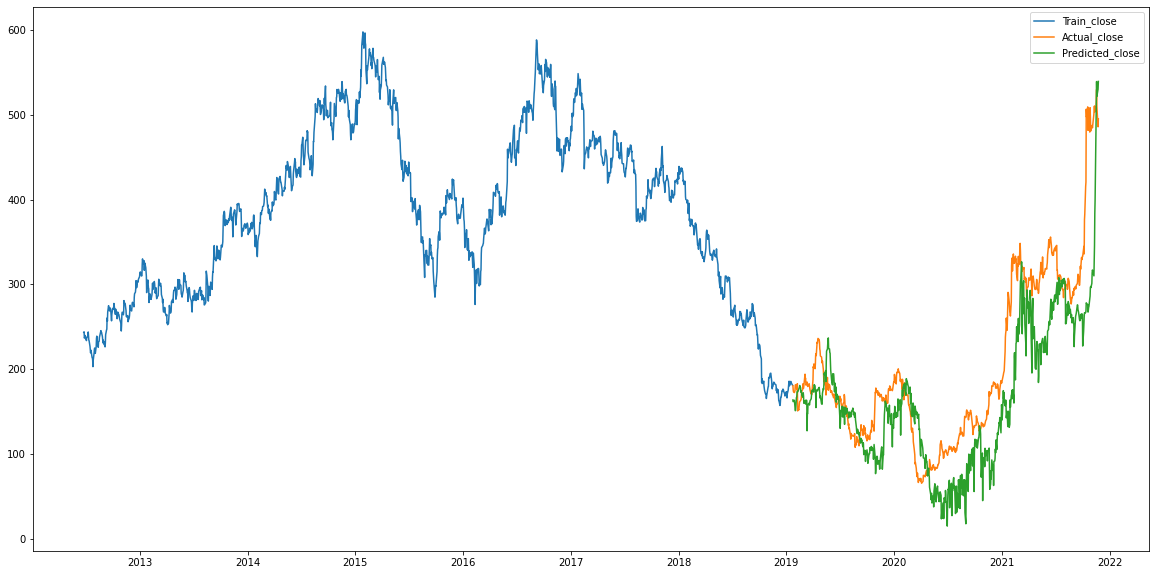

In [ ]:
#new_data.set_index('Date', inplace=True)
test_data['Predictions'] = 0
test_data['Predictions'] = price_prediction

test_data.index = new_data[train_size:].index
train_data.index = new_data[:train_size].index

pt.figure(figsize=(20,10))
pt.plot(train_data['Close'])
pt.plot(test_data[['Close', 'Predictions']])
pt.legend(['Train_close', 'Actual_close', 'Predicted_close'])

KNN

In [ ]:
# from sklearn import neighbors
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[4,5,6,7,8,9,10,11]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(X_train,Y_train)
price_prediction_KNN = model.predict(X_test)

In [ ]:
rms_KNN=np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(price_prediction_KNN)),2)))
rms

63.89653090586305

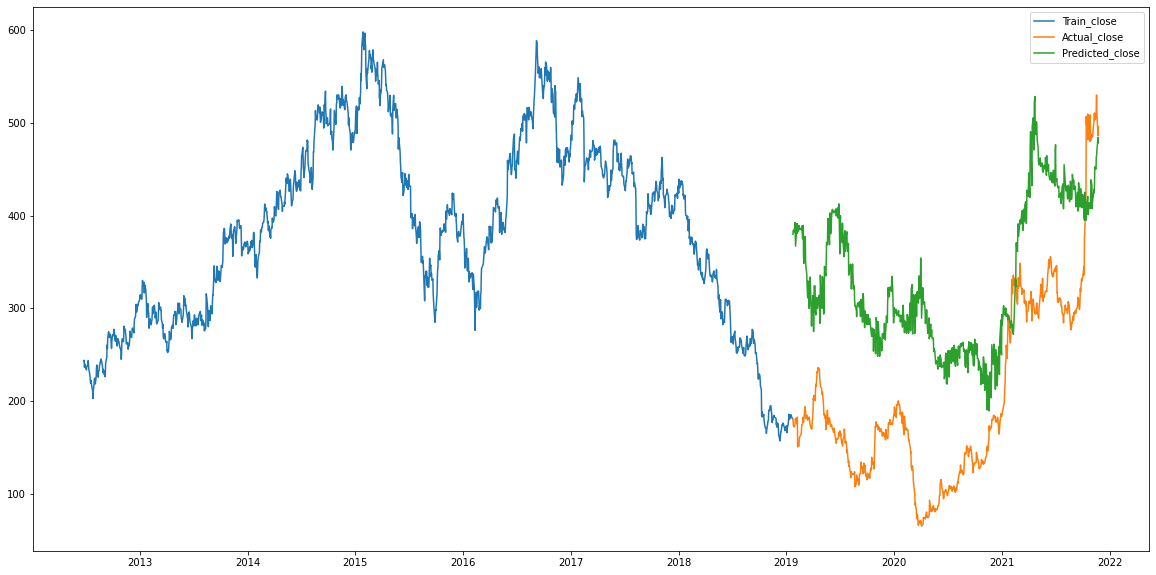

In [ ]:
test_data['Predictions'] = 0
test_data['Predictions'] = price_prediction_KNN

test_data.index = new_data[train_size:].index
train_data.index = new_data[:train_size].index

pt.figure(figsize=(20,10))
pt.plot(train_data['Close'])
pt.plot(test_data[['Close', 'Predictions']])
pt.legend(['Train_close', 'Actual_close', 'Predicted_close'])

KNN is only able to capture the basic flow of price as with increased dimensions the performance of KNN model decreases

### Using models which take in account for historical prices but does not require seperate features

Auto-Arima

In [ ]:
from pmdarima import auto_arima

In [ ]:
data = df.sort_index(ascending=True, axis=0)
#display(data)

In [ ]:
train_size = int(0.7*data.shape[0])
test_size = int(0.3*data.shape[0])
print(train_size)
print(test_size)

1662
712


In [ ]:
train_data = data[:train_size]
test_data = data[train_size:]
# only CLose Price is provided as data no other features
train = train_data['Close']
test = test_data['Close']
model = auto_arima(train, start_p=5, start_q=5,max_p=25, max_q=15, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(train)


Performing stepwise search to minimize aic
 ARIMA(5,1,5)(0,1,1)[12]             : AIC=inf, Time=44.62 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=12809.178, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=12309.961, Time=0.78 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.35 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=12808.648, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=12174.142, Time=1.69 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=20.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=6.93 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=12173.264, Time=1.33 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=12309.009, Time=0.50 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=14.23 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=4.30 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=12174.014, Time=2.23 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=17.76 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
predictions = model.predict(n_periods=test_size+1)
prediction_arima = pd.DataFrame(predictions,index = test_data.index,columns=['Prediction'])


In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(test_data['Close'])-np.array(prediction_arima['Prediction'])),2)))
rms

226.27290877544834

The model prdicted initial downfall correctly which provided a good bound

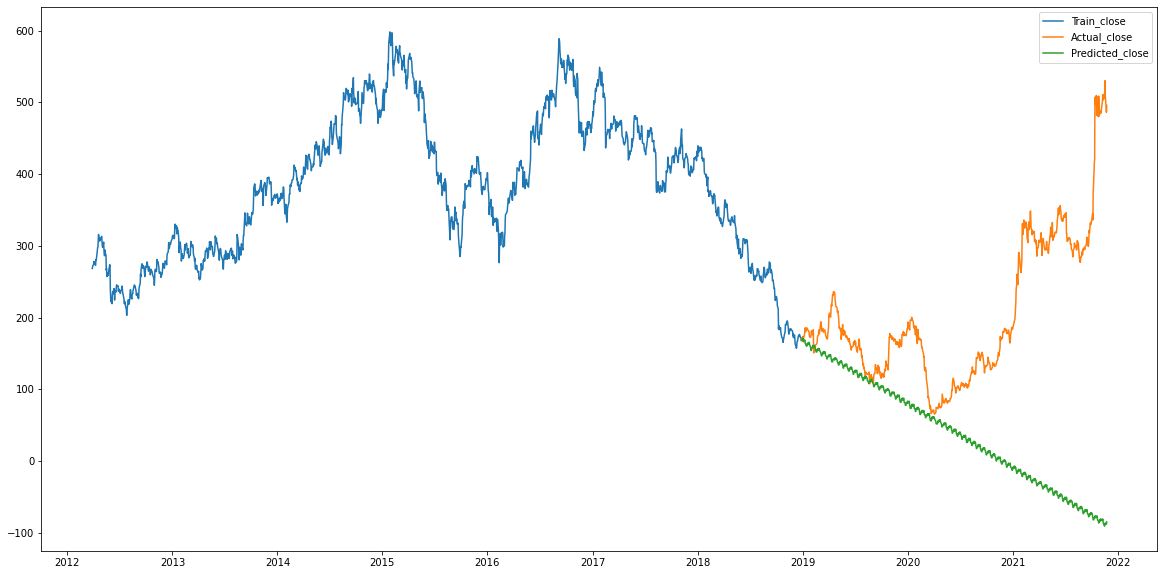

In [ ]:
pt.figure(figsize=(20,10))
pt.plot(train_data['Close'])
pt.plot(test_data['Close'])
pt.plot(prediction_arima['Prediction'])
pt.legend(['Train_close', 'Actual_close', 'Predicted_close'])

**LSTM**

The LSTM model is Recurrent Neural Network which considers the data from past and works through a loop. Neural Network induces non-linearity.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
data = df.sort_index(ascending=True, axis=0)

In [ ]:
#display(data)

In [ ]:
data=data.reset_index()
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
display(new_data)

,Close
Date,
2012-03-28,268.273
2012-03-29,269.064
2012-03-30,272.329
2012-04-02,273.863
2012-04-03,278.265
...,...
2021-11-16,519.05
2021-11-17,530.15
2021-11-18,509.7


In [ ]:
train_size = int(0.7*new_data.shape[0])
test_size = int(0.3*new_data.shape[0])
print(train_size)
print(test_size)

1662
712


In [ ]:
dataset = new_data.values
dataset

array([[268.27252197265625],
       [269.06402587890625],
       [272.3290100097656],
       [273.862548828125],
       ...,
       [530.1500244140625],
       [509.70001220703125],
       [486.1000061035156],
       [495.5]], dtype=object)

In [ ]:
train = dataset[0:train_size,:]
test = dataset[train_size:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Training intances are lagged by 100 days here thus providing the hitorical element
x_train, y_train = [], []
for i in range(100,len(train)):
    x_train.append(scaled_data[i-100:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=100,activation = 'tanh', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=100))
# model.add(LSTM(50, activation='tanh',))
# model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test) - 100:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(100,inputs.shape[0]):
    X_test.append(inputs[i-100:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1562/1562 - 68s - loss: 0.0025 - 68s/epoch - 43ms/step


In [ ]:
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms

17.04918868275994

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


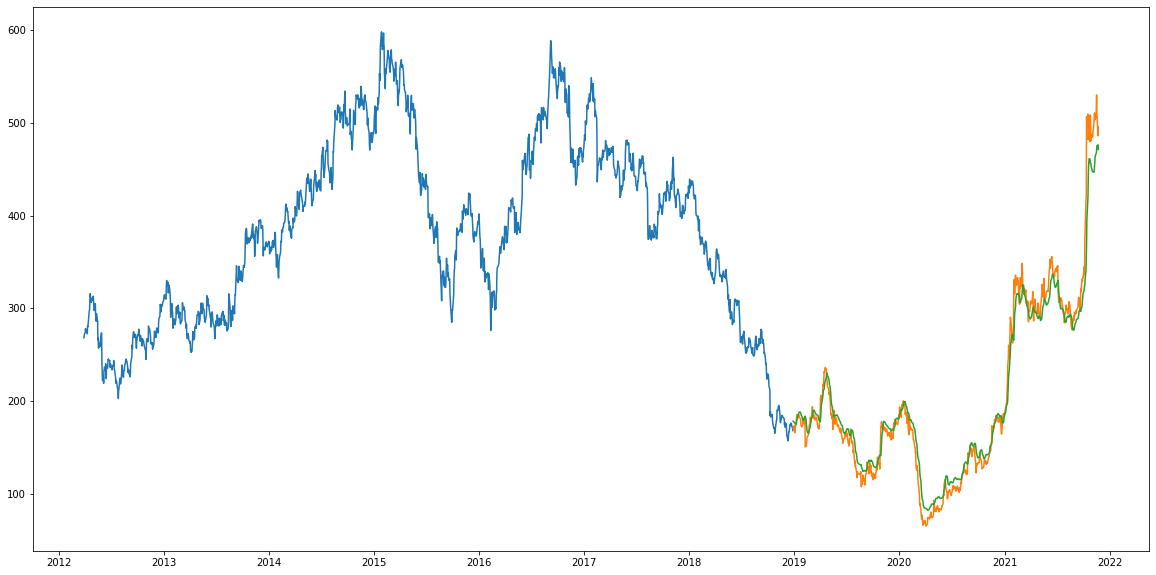

In [ ]:
train = new_data[:train_size]
test = new_data[train_size:]
test['Predictions'] = closing_price
pt.figure(figsize = (20,10))
pt.plot(train['Close'])
pt.plot(test[['Close','Predictions']])